In [4]:
# !pip install --upgrade ultralytics 

In [3]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.49 🚀 Python-3.10.9 torch-1.13.1 CPU
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 200.9/460.4 GB disk)


In [5]:
# set the path way
import os 
HOME = os.getcwd()
print(HOME)

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile


### 1. Load the Libraries 

In [6]:
from ultralytics import YOLO 
from  IPython.display  import display, Image, clear_output  # to display images
from roboflow import Roboflow
from dotenv import load_dotenv

load_dotenv()

True

In [19]:
# Set your Roboflow API key


### 2. Download Labeled Images from Roboflow

In [7]:


# Set your Roboflow workspace ID
!mkdir {HOME}/datasets 
%cd {HOME}/datasets

rf = Roboflow(api_key="8lmMXJ1M3kD5JIBd7fyz")
project = rf.workspace("adebayo-akinlalu-58jxx").project("daily-item")
dataset = project.version(1).download("yolov8")


/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to daily-item-1 in yolov8:: 100%|██████████| 784/784 [00:00<00:00, 10631.67it/s]


### 3. Training Custom Weight using CLI
- **imgsz:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 100+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **model:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.


In [10]:
#train3 - yolov8s.pt imgz 640
#train4 - yolov8n.pt imgz 640
#train5 - yolov8s.pt imgz 320
#train6 - yolov8n.pt imgz 320

'/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile/datasets/daily-item-1'

In [44]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=10 imgsz=320

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile
Ultralytics YOLOv8.0.49 🚀 Python-3.10.9 torch-1.13.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile/datasets/daily-item-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agno

In [45]:
!cp -R /Users/adebayoakinlaluclearxp/.pyenv/runs/detect/train6  ./runs

### 4. Performance Matrics

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile


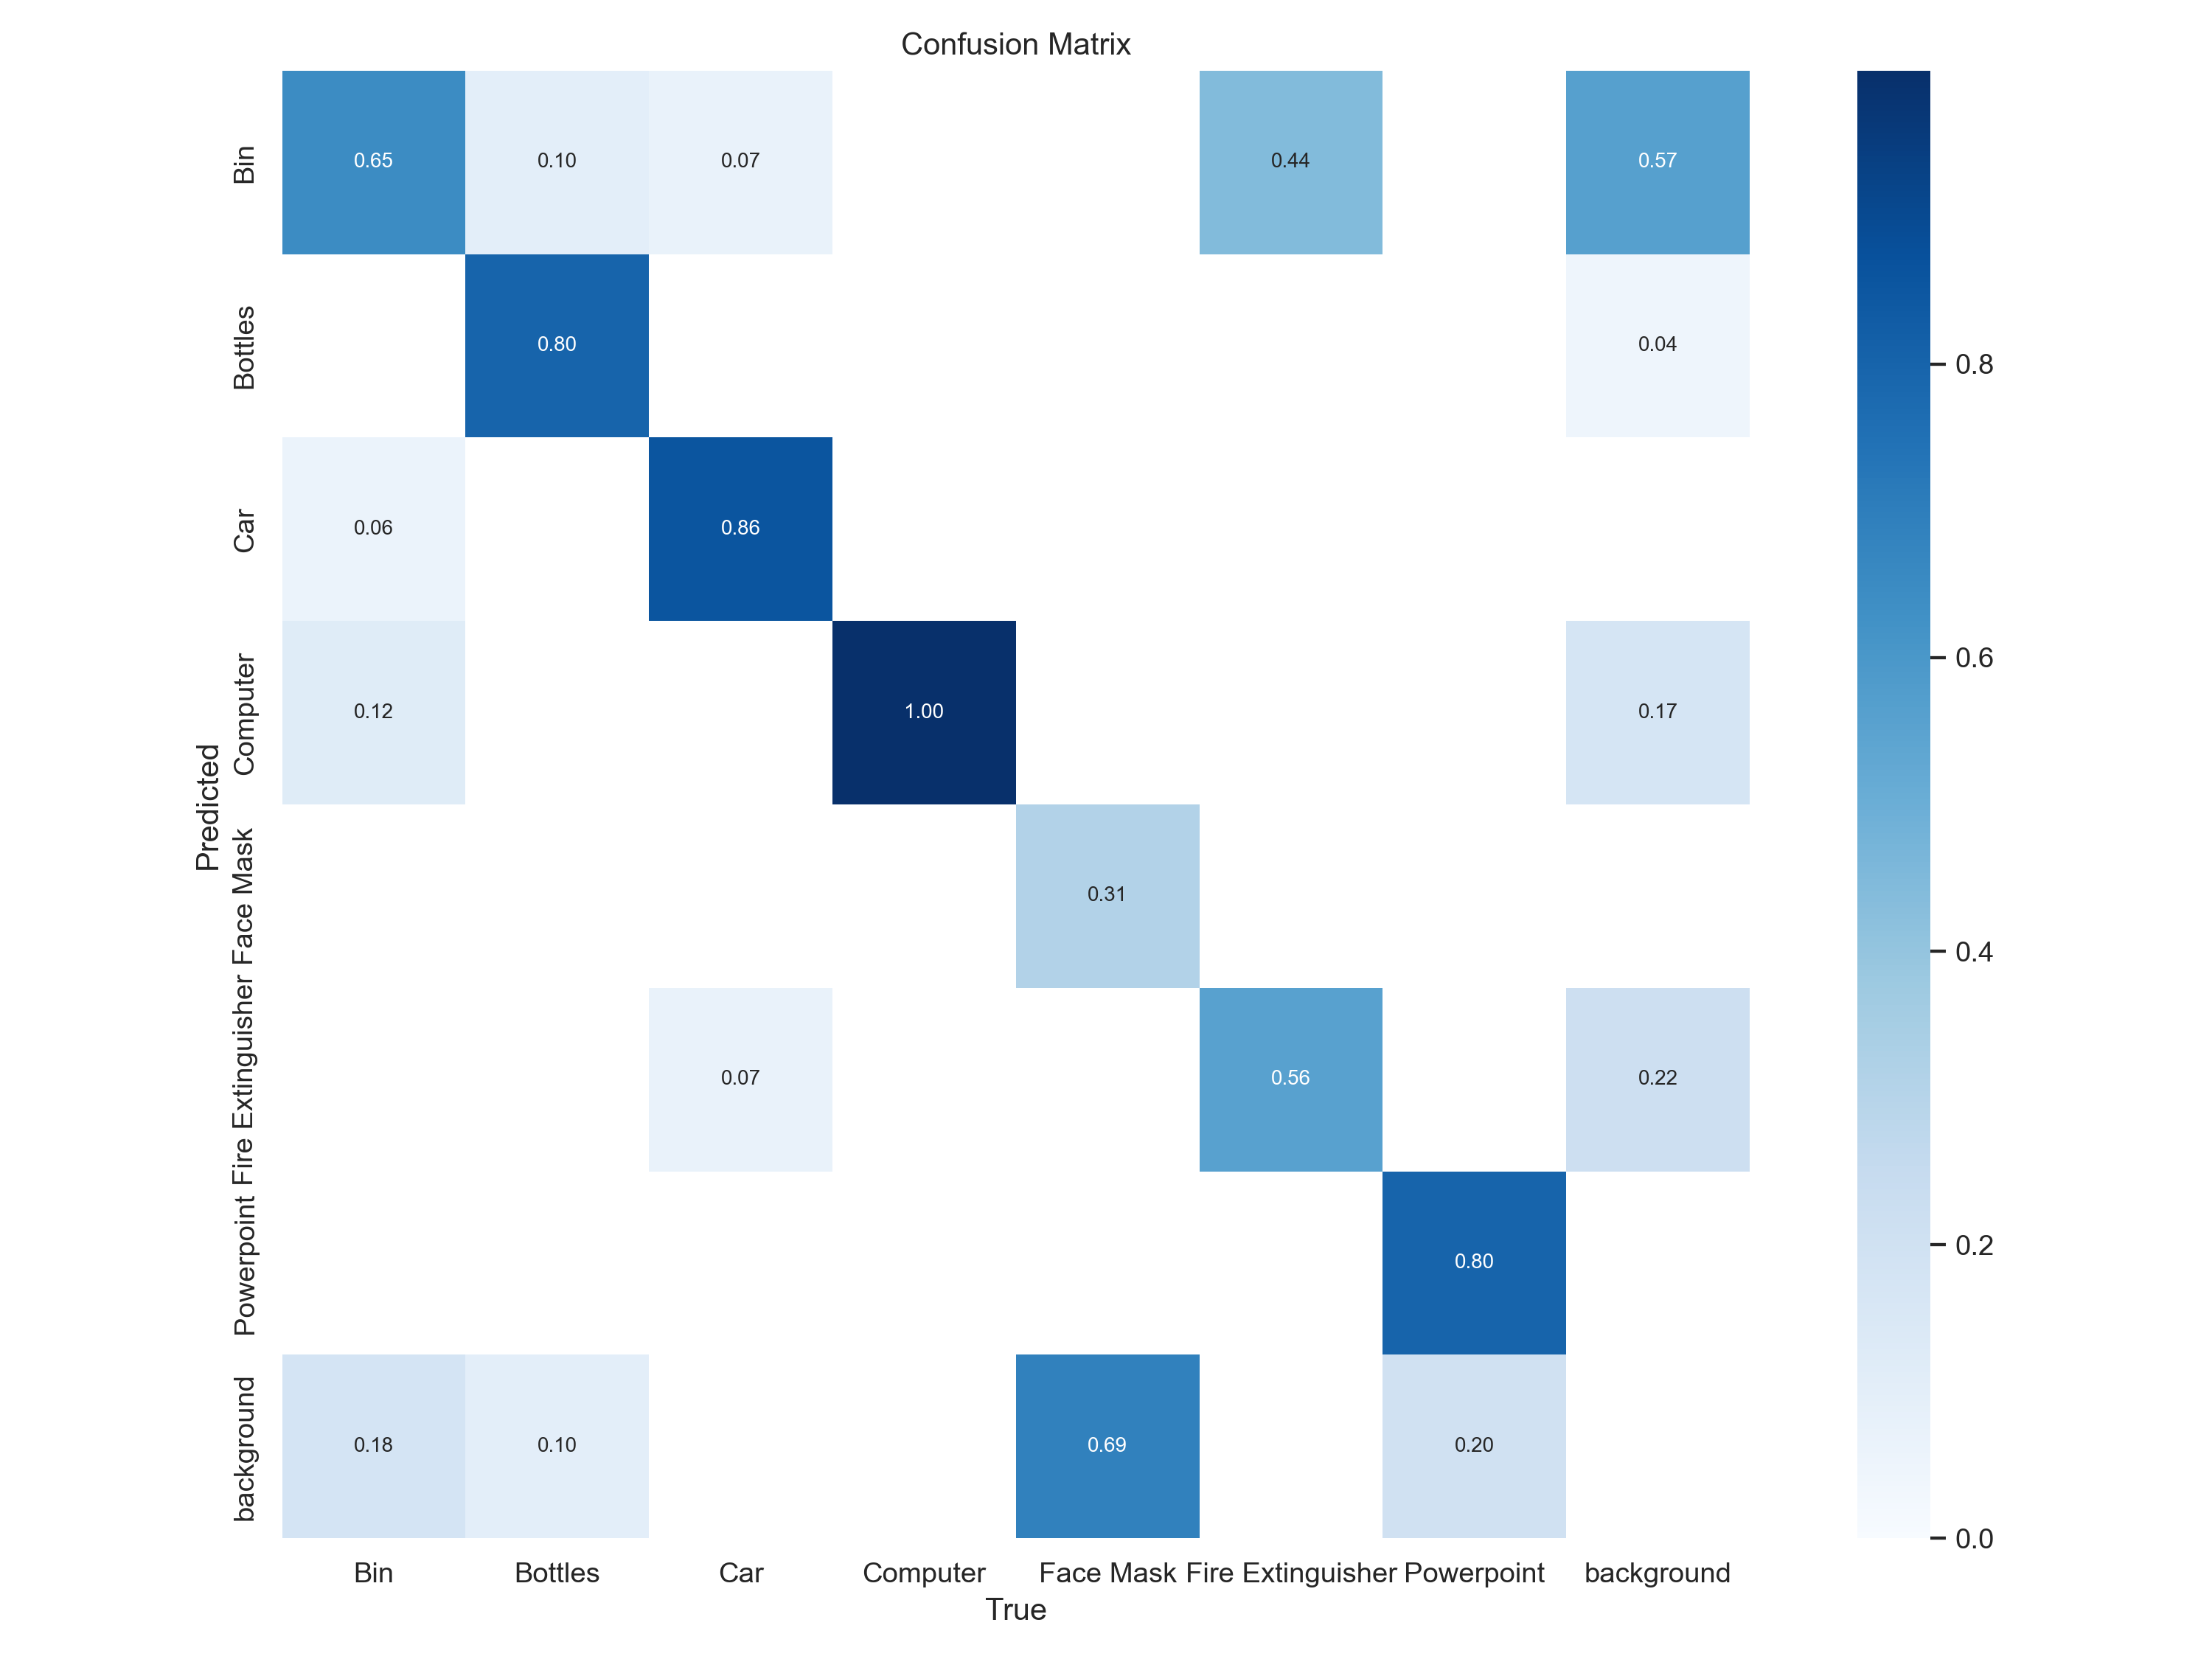

In [46]:
%cd {HOME}
Image(filename='runs/train6/confusion_matrix.png', width=1000)

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile


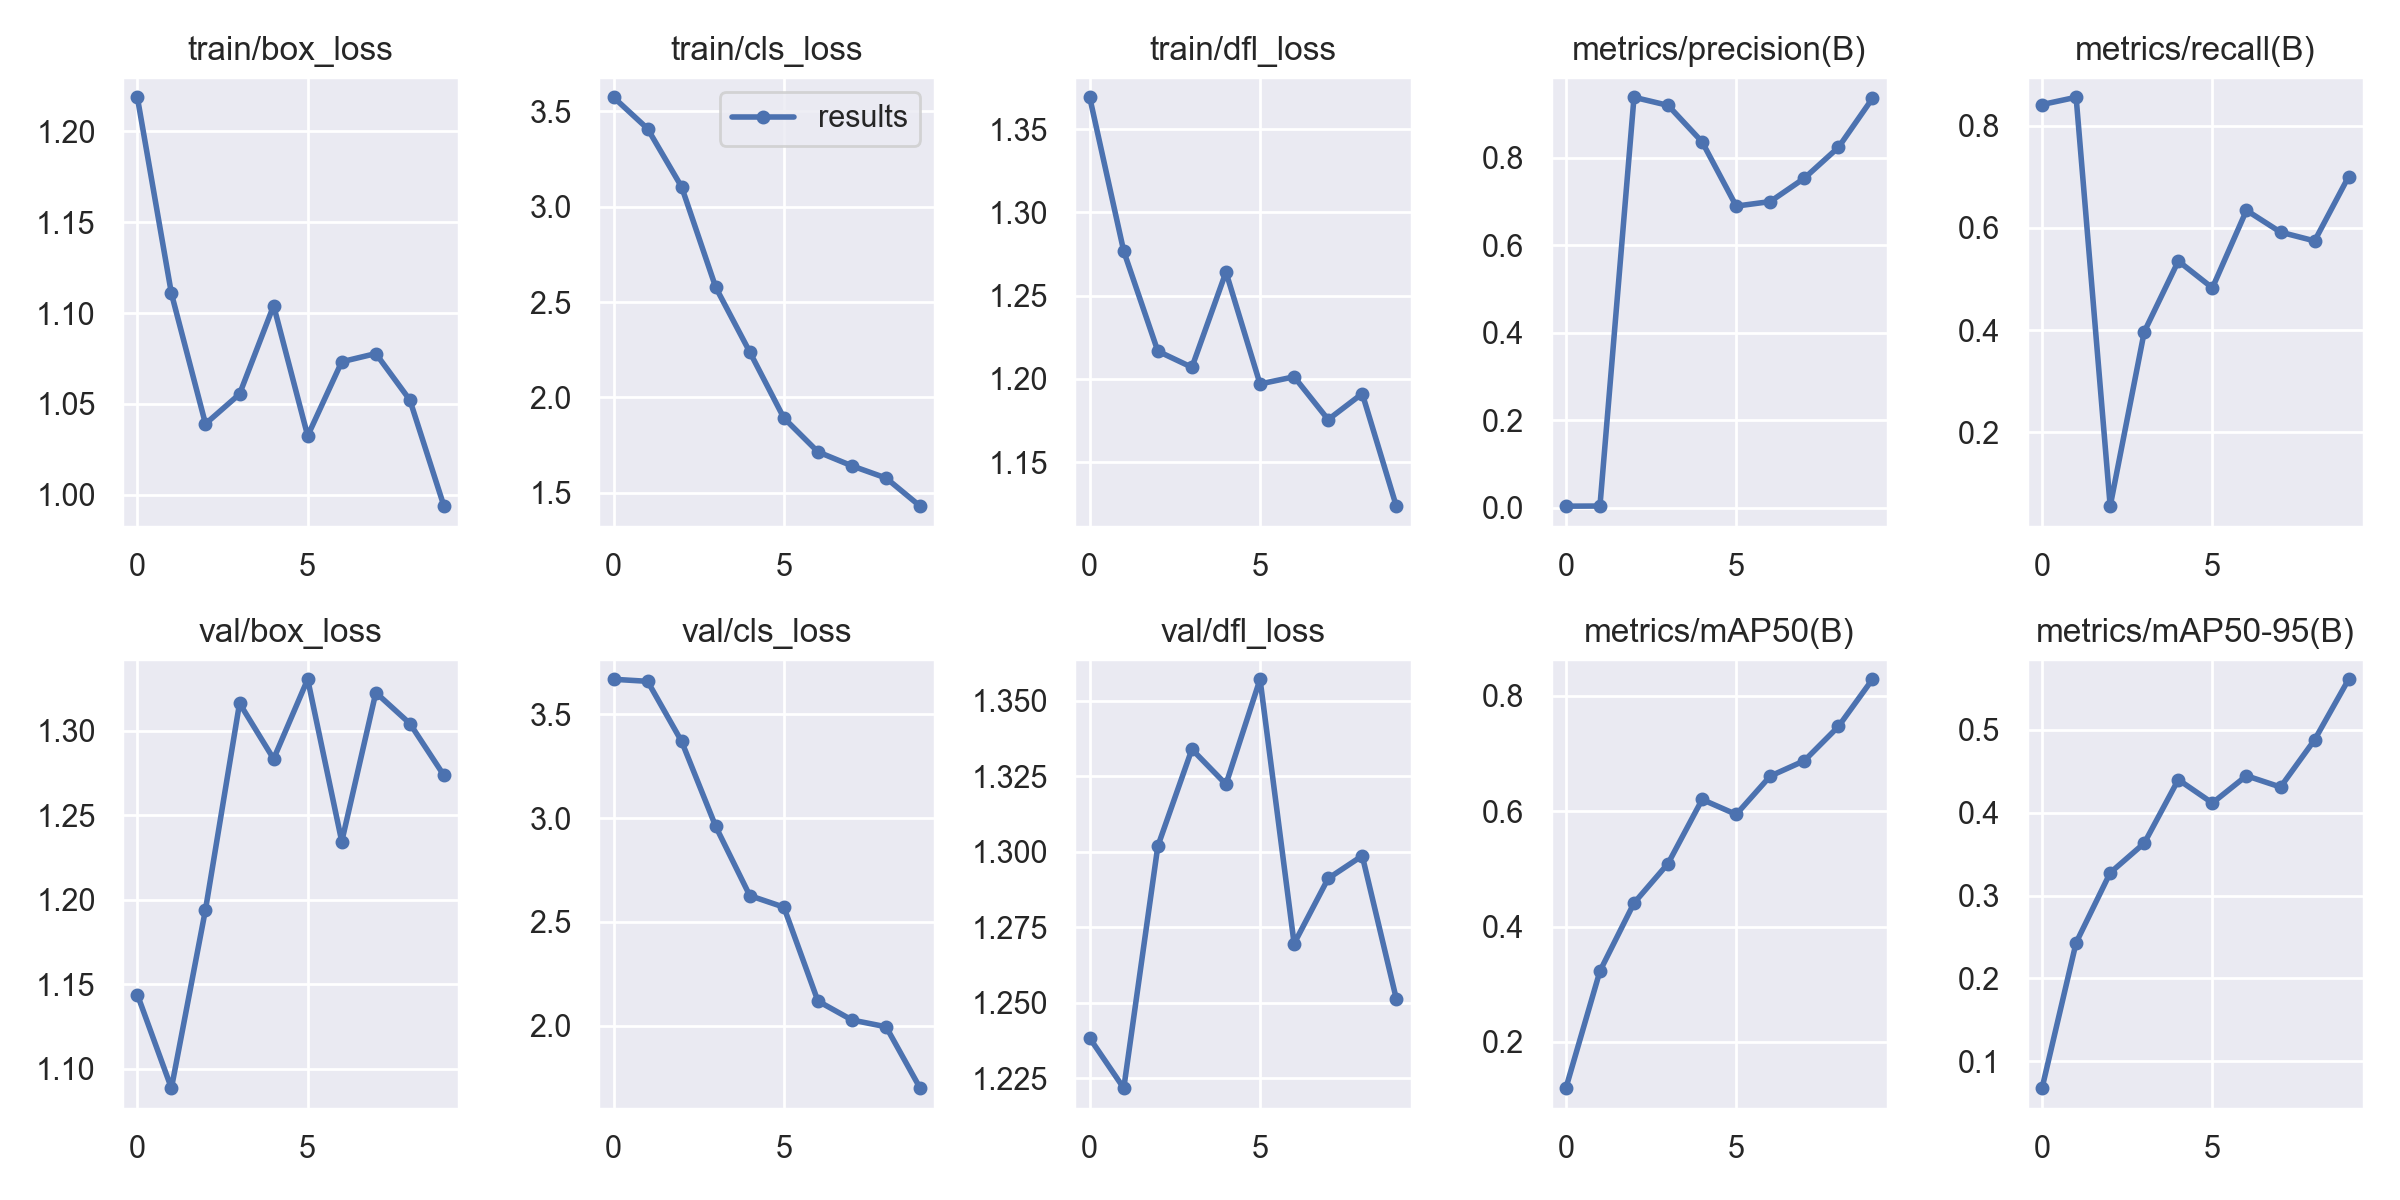

In [47]:
%cd {HOME}
Image(filename='runs/train6/results.png', width=1000)

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile


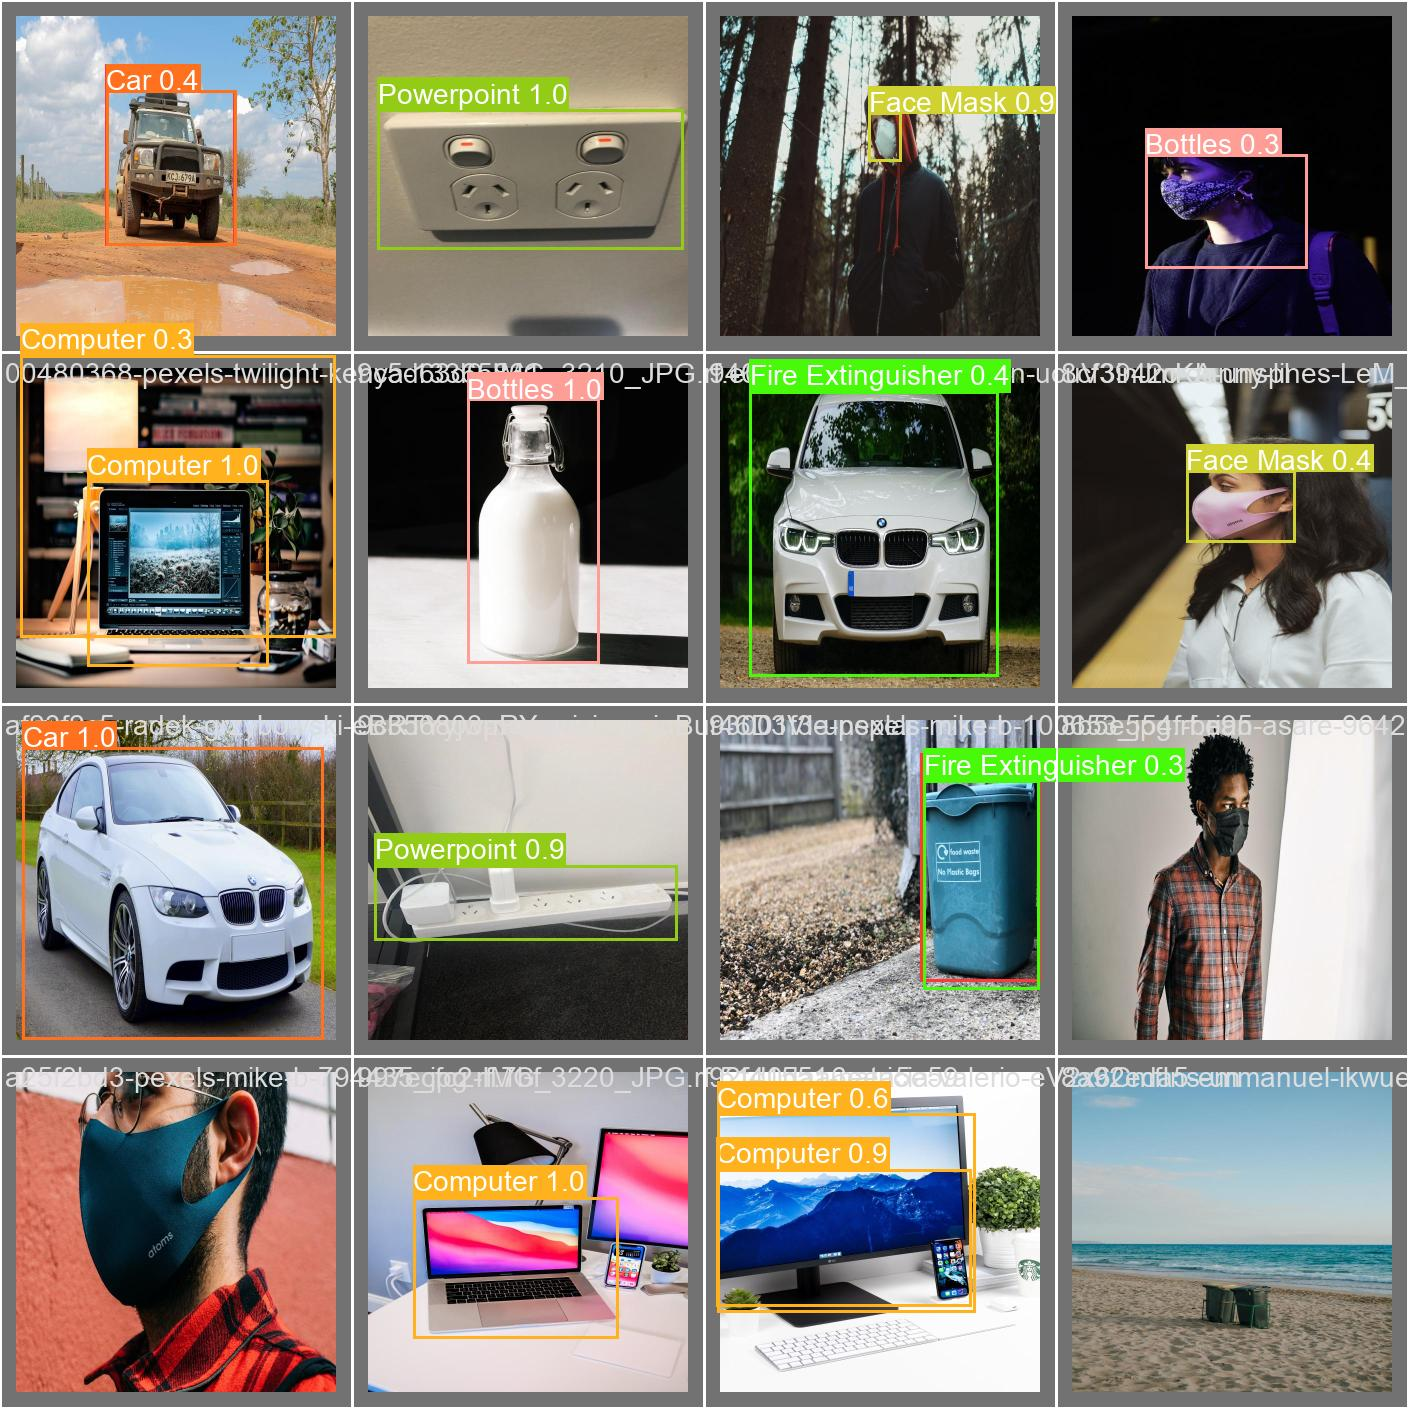

In [48]:
%cd {HOME}
Image(filename='runs/train6/val_batch0_pred.jpg', width=1000)

#### 4.1 Evaluate custom YOLOv8 detector performance using CLI

* The key metric to focus on is `mAP>=0.5`  

* Average precision computes the average precision value for recall value over 0 to 1.  

* In some context, we compute the AP for each class and average them

In [49]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/train6/weights/best.pt data={dataset.location}/data.yaml

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile
Ultralytics YOLOv8.0.49 🚀 Python-3.10.9 torch-1.13.1 CPU
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolo
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         78         83      0.937        0.7      0.828      0.561
                   Bin         78         17      0.867      0.647      0.766       0.52
               Bottles         78         10      0.978        0.9      0.907      0.598
                   Car         78         14          1      0.709      0.954      0.763
              Computer         78          7      0.775          1      0.995      0.758
             Face Mask         78         16          1      0.187      0.491      0.236
     Fire Extinguisher         78          9      0.939      0.889      0.922      0.559
   

### 5. Inference with custom Weights using CLI

In [50]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile
Ultralytics YOLOv8.0.49 🚀 Python-3.10.9 torch-1.13.1 CPU
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

image 1/39 /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile/datasets/daily-item-1/test/images/080639bc-weatherproof_double_powerpoint_png.rf.c3c2b7ded6b3949496f727dee5e01648.jpg: 320x320 1 Powerpoint, 25.8ms
image 2/39 /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile/datasets/daily-item-1/test/images/0deb2cc5-pexels-mike-b-810357_jpg.rf.f64a720c49a5ee4cc9eac0a1b7605685.jpg: 320x320 1 Car, 21.0ms
image 3/39 /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile/datasets/daily-item-1/test/images/155004c6-pexels-akshay-ravi-4381988_jpg.rf.6b6e1e8612923a0df8e5620361150192.jpg: 320x320 (no detections), 23.1ms
image 4/39 /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile/datasets/dail

In [24]:
import glob

# for image in glob.glob(f"{HOME}/runs/detect/predict2/*.jpg")[:5]:
#     display(Image(filename=image, width=600))
#     print("\n")

### Export CLI

In [51]:
%cd {HOME}

!yolo task=detect mode=export model={HOME}/runs/train6/weights/best.pt format=tfjs  

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile
Ultralytics YOLOv8.0.49 🚀 Python-3.10.9 torch-1.13.1 CPU
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile/runs/train6/weights/best.pt with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 11, 2100) (5.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.11.0...

ONNX: starting export with onnx 1.13.0...
ONNX: simplifying with onnxsim 0.4.17...
ONNX: export success ✅ 0.7s, saved as /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile/runs/train6/weights/best.onnx (11.6 MB)

TensorFlow SavedModel: running onnx2tf -i /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile/runs/train6/weights/best.onnx -o /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8-mobile/runs/train6/weights/best_saved_model -nuo --no